In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/spamhamdata (2).csv',sep='\t',names=['class','text']) # Read the dataset.
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.shape

(5572, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df['class'].value_counts()

,count
class,
ham,4825
spam,747


In [5]:
#lowercase -> APpLe -> apple

s = 'APpLe'
s.lower()

'apple'

In [6]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [7]:
df.head()

,class,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [8]:
#puntuation removal
# ok... -> ok

In [9]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
s = 'ok...'
s2 = ''

for i in s:
    if i not in string.punctuation:
        s2 += i

s2

'ok'

In [11]:
def remove_punct(s):
    s2 = ''
    for i in s:
        if i not in string.punctuation:
            s2 += i

    return s2

In [12]:
s = 'ok! .ok...'
remove_punct(s)

'ok ok'

In [13]:
df['text'] = df['text'].apply(lambda x:remove_punct(x))

In [14]:
df.head()

,class,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [17]:
text = 'i am very late to the school'
filtered_text = ''
for i in text.split():
    if i not in stop_words:
        filtered_text += ' ' + i

filtered_text.strip()

'late school'

In [145]:
def remove_stopwords(text):
    filtered_text = ''
    for i in text.split():
        if i not in stop_words:
            filtered_text += ' ' + i
    return filtered_text.strip()

In [19]:
df['text'] = df['text'].apply(lambda x:remove_stopwords(x))

In [20]:
df.head()

,class,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [21]:
text = 'i am very late to the school'
filtered_text = ''
for i in text.split():
    if len(i) > 2:
        filtered_text += ' ' + i

filtered_text.strip()

'very late the school'

In [22]:
def remove_words_less_than_two_chars(text):
    filtered_text = ''
    for i in text.split():
        if len(i) > 2:
            filtered_text += ' ' + i
    return filtered_text.strip()

In [23]:
df['text'] = df['text'].apply(lambda x:remove_words_less_than_two_chars(x))

In [24]:
df.head()

,class,text
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts 21st m...
3,ham,dun say early hor already say
4,ham,nah dont think goes usf lives around though


In [25]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
'died', 'agreed', 'owned', 'humbled', 'sized',
'meeting', 'stating', 'siezing', 'itemization',
'sensational', 'traditional', 'reference', 'colonizer',
'plotted']

singles = [stemmer.stem(plural) for plural in plurals]

In [26]:
singles

['caress',
 'fli',
 'die',
 'mule',
 'deni',
 'die',
 'agre',
 'own',
 'humbl',
 'size',
 'meet',
 'state',
 'siez',
 'item',
 'sensat',
 'tradit',
 'refer',
 'colon',
 'plot']

In [27]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
lemma_res = [wnl.lemmatize(plural) for plural in plurals]
lemma_res

['caress',
 'fly',
 'dy',
 'mule',
 'denied',
 'died',
 'agreed',
 'owned',
 'humbled',
 'sized',
 'meeting',
 'stating',
 'siezing',
 'itemization',
 'sensational',
 'traditional',
 'reference',
 'colonizer',
 'plotted']

In [30]:
import spacy

# Define a text string
text = "This is a sample text. It contains some words that we can use for lemmatization."

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(text)

# Lemmatize each token and print the result
for token in doc:
  lemma = token.lemma_
  print(token.text, "-->", lemma)

This --> this
is --> be
a --> a
sample --> sample
text --> text
. --> .
It --> it
contains --> contain
some --> some
words --> word
that --> that
we --> we
can --> can
use --> use
for --> for
lemmatization --> lemmatization
. --> .


In [32]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

text = 'i am going to school every weekend.'
processed_text = ''

for i in text.split():
    stem_word = stemmer.stem(i)
    processed_text += ' ' + stem_word

processed_text.strip()

'i am go to school everi weekend.'

In [33]:
text = 'i am going to school every weekend.'
processed_text = ''

for i in text.split():
    stem_word = wnl.lemmatize(i)
    processed_text += ' ' + stem_word

processed_text.strip()

'i am going to school every weekend.'

In [36]:
text = 'i am going to school every weekend.'
processed_text = ''

doc = nlp(text)
for token in doc:
    lemma = token.lemma_
    processed_text += ' ' + lemma

processed_text.strip()

'I be go to school every weekend .'

In [37]:
def stemming_text(text):
    processed_text = ''

    for i in text.split():
        stem_word = stemmer.stem(i)
        processed_text += ' ' + stem_word

    return processed_text.strip()

In [38]:
df['text'] = df['text'].apply(lambda x:stemming_text(x))

In [39]:
df.head()

,class,text
0,ham,jurong point crazi avail bugi great world buff...
1,ham,lar joke wif oni
2,spam,free entri wkli comp win cup final tkts 21st m...
3,ham,dun say earli hor alreadi say
4,ham,nah dont think goe usf live around though


In [40]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 48.5 MB/s eta 0:00:00


In [43]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    print(word)
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

hapenning
happening
{'penning', 'happening', 'apennine', 'japanning'}


In [46]:
text = 'it is hapenning'
misspelled = spell.unknown(text.split())

preproessed_text = ''
for word in text.split():
    if word in misspelled:
        cw = spell.correction(word)
        preproessed_text += ' ' + cw
    else:
        preproessed_text += ' ' + word

preproessed_text.strip()

'it is happening'

In [49]:
def spell_correction(text):
    misspelled = spell.unknown(text.split())

    preproessed_text = ''
    for word in text.split():
        if word in misspelled:
            cw = spell.correction(word)
            if cw != None:
                preproessed_text += ' ' + cw
            else:
                preproessed_text += ' ' + word
        else:
            preproessed_text += ' ' + word

    return preproessed_text.strip()

In [51]:
from tqdm.notebook import tqdm
tqdm.pandas()
# df['text'] = df['text'].progress_apply(lambda x:spell_correction(x))

In [52]:
df.head()

,class,text
0,ham,jurong point crazi avail bugi great world buff...
1,ham,lar joke wif oni
2,spam,free entri wkli comp win cup final tkts 21st m...
3,ham,dun say earli hor alreadi say
4,ham,nah dont think goe usf live around though


In [53]:
X = df['text']
y = df['class']

In [55]:
X

,text
0,jurong point crazi avail bugi great world buff...
1,lar joke wif oni
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor alreadi say
4,nah dont think goe usf live around though
...,...
5567,2nd time tri contact £750 pound prize claim ea...
5568,go esplanad home
5569,piti mood soani suggest
5570,guy bitch act like interest buy someth els nex...


In [54]:
y

,class
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X_train

,text
5484,pick various point go yeovil motor project hou...
4135,yahoo boy bring perf legal
339,sorri ill call later
1217,new voicemail pleas call 08719181513
2495,tri figur much money everyon gas alcohol jay t...
...,...
4608,run manag minut need oxygen might resort rolle...
3990,lor anyway thk cant get ticket cos like quit l...
3584,sent maga money yesterday
1181,chennai velacheri


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [67]:
X_train.shape,y_train.shape

((4457, 5000), (4457,))

In [68]:
X_test.shape,y_test.shape

((1115, 5000), (1115,))

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [78]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.99798070450976
Test Accuracy: 0.9901345291479821


In [79]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9966940915232578
Test Accuracy: 0.9724650999364839


In [80]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[958,   3],
       [  8, 146]])

In [81]:
y_test.unique()

array(['ham', 'spam'], dtype=object)

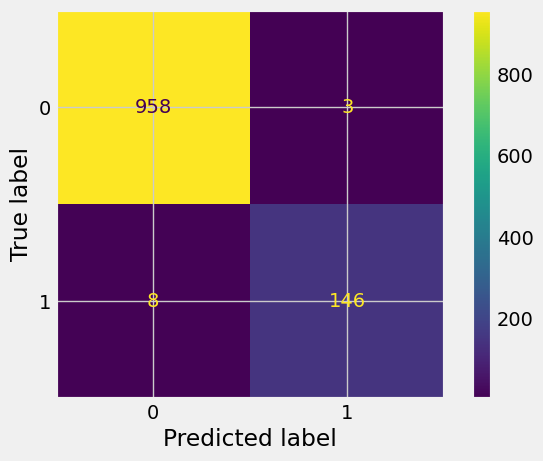

In [82]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [83]:
(146)/(146+8)

0.948051948051948

In [93]:
param_grid = {'penalty':['l1', 'l2'],
              'C':[0.01,0.1,1,10,100],
              'class_weight':[None,'balanced']}

In [94]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(lr,
                              param_grid,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              cv=3)

In [95]:
grid_serach_cv

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [96]:
grid_serach_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [98]:
grid_serach_cv.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(**grid_serach_cv.best_params_)
lr.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced')

In [100]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.99798070450976
Test Accuracy: 0.9901345291479821


In [101]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9966940915232578
Test Accuracy: 0.9724650999364839


In [102]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[958,   3],
       [  8, 146]])

In [103]:
y_test.unique()

array(['ham', 'spam'], dtype=object)

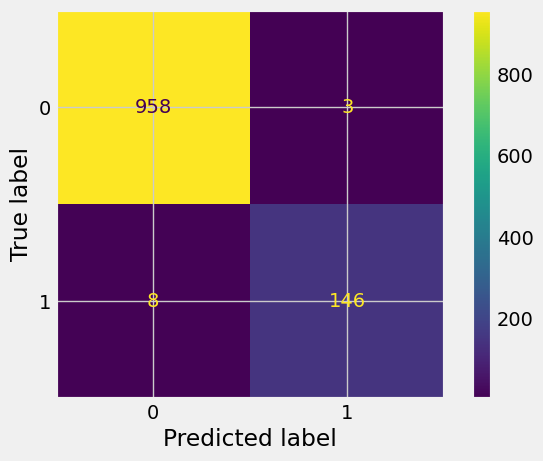

In [104]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [105]:
(146)/(146+8)

0.948051948051948

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9995512676688355
Test Accuracy: 0.9704035874439462


In [110]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9983136593591906
Test Accuracy: 0.9064894522750923


In [111]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[956,   5],
       [ 28, 126]])

In [112]:
y_test.unique()

array(['ham', 'spam'], dtype=object)

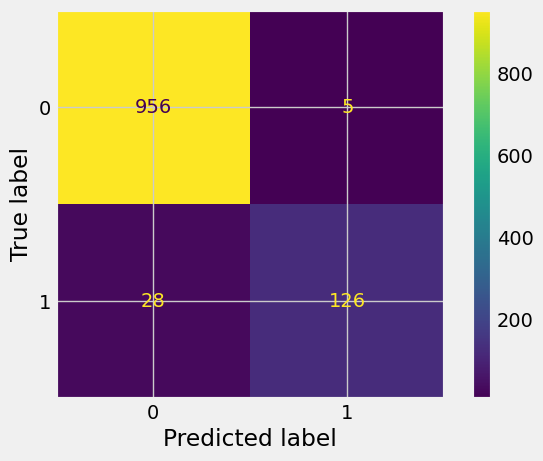

In [113]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [114]:
(126)/(126+28)

0.8181818181818182

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [128]:
param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(10,101,5)),
              'class_weight':[None,'balanced']}

In [129]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(dt,
                              param_grid,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              cv=3)

In [130]:
grid_serach_cv

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=40, splitter='random'),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70, 75, 80, 85, 90, 95, 100],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [131]:
grid_serach_cv.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=40, splitter='random'),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70, 75, 80, 85, 90, 95, 100],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [133]:
grid_serach_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 50,
 'splitter': 'random'}

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(**grid_serach_cv.best_params_)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=50, splitter='random')

In [135]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9939421135292797
Test Accuracy: 0.9497757847533632


In [136]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9950786697111573
Test Accuracy: 0.9163344459910536


In [137]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[925,  36],
       [ 20, 134]])

In [138]:
y_test.unique()

array(['ham', 'spam'], dtype=object)

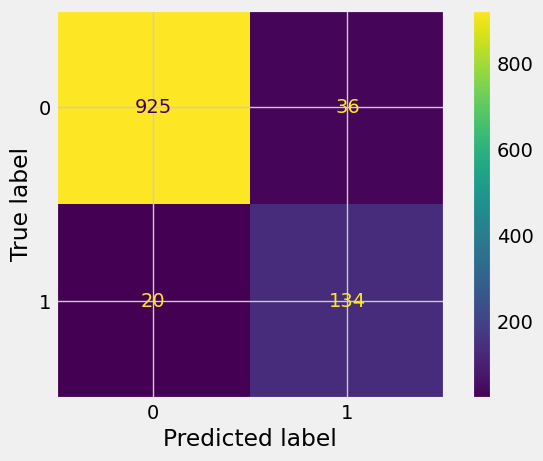

In [139]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [140]:
(134)/(134+20)

0.8701298701298701

In [142]:
import joblib
joblib.dump(lr,'model.joblib')
joblib.dump(vectorizer,'vectorizer.joblib')

['vectorizer.joblib']

In [144]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [146]:
def proprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    text = remove_stopwords(text)
    text = remove_words_less_than_two_chars(text)
    text = stemming_text(text)
    # text = spell_correction(text)
    return text

In [155]:
text = 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question'
text = proprocess_text(text)
text

'free entri wkli comp win cup final tkts 21st may 2005 text 87121 receiv entri question'

In [156]:
arr = vectorizer.transform([text])
pred = lr.predict(arr)
pred

array(['spam'], dtype=object)

In [157]:
pred = np.max(lr.predict_proba(arr))
pred

np.float64(0.992593450100213)